In [2]:
import nltk
from nltk.corpus import stopwords
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import random
import spacy
import time
import csv
import re

In [3]:
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
openfile = open("/content/nytimes_news_articles.txt", "r")
# Printing first 30 lines from the file
c = 0
for line in openfile:
    c += 1
    # Remove extra spaces
    print(line.strip())
    if c == 30:
        break

# Don't forget to close the file..
openfile.close()

URL: http://www.nytimes.com/2016/06/30/sports/baseball/washington-nationals-max-scherzer-baffles-mets-completing-a-sweep.html

WASHINGTON — Stellar pitching kept the Mets afloat in the first half of last season despite their offensive woes. But they cannot produce an encore of their pennant-winning season if their lineup keeps floundering while their pitching is nicked, bruised and stretched thin.
“We were going to ride our pitching,” Manager Terry Collins said before Wednesday’s game. “But we’re not riding it right now. We’ve got as many problems with our pitching as we do anything.”
Wednesday’s 4-2 loss to the Washington Nationals was cruel for the already-limping Mets. Pitching in Steven Matz’s place, the spot starter Logan Verrett allowed two runs over five innings. But even that was too large a deficit for the Mets’ lineup to overcome against Max Scherzer, the Nationals’ starter.
“We’re not even giving ourselves chances,” Collins said, adding later, “We just can’t give our pitcher

In [5]:
URL = []
content = []
flag = False

with open("/content/nytimes_news_articles.txt", "r") as file:
    for line in file:
        if(flag):
            if line.startswith("URL: "):
                # When current article ends
                # Append all content, set the flag
                flag = False
                content.append(get_content)
                get_content = []
            else:
                # Store article content
                if line.strip():
                    get_content.append(line)

        if line.startswith("URL: "):
            # We are here when we encounter a *new article*
            get_content = []
            flag = True
            URL.append(line.strip().replace("URL: ", ""))

# Since the last URL doesn't have any content, we remove it
del URL[-1]

In [6]:
len(URL)

8887

In [7]:
content[5]

['OMAHA — In the first three races of her third Olympic trials — two heats of the 100-meter backstroke and the 200-meter freestyle preliminaries — Missy Franklin swam scared. She put together a more composed race in the semifinals of the 200, and then a day later, in Wednesday’s final, Franklin broke free of the chains of anxiety that had constrained her.\n',
 'Franklin, 21, finished second to Katie Ledecky in a time of 1 minute 56.18 seconds to earn a berth in the individual event and the 4x200 freestyle relay at the Summer Games in Rio de Janeiro. Ledecky was clocked in 1:54.88.\n',
 '“People say there’s nothing like making your first Olympic team,” Franklin said. “But there’s nothing like making your second Olympic team.”\n',
 'Allison Schmitt, the reigning Olympic champion in the 200 freestyle, will not defend her title. But the tears she shed after the race were not from disappointment. “I don’t know the last time I had happy tears,” said Schmitt, who finished fourth to secure her

In [8]:
df = pd.DataFrame({'url': URL, 'content': content})

In [9]:
df['content']= df['content'].str.join(' ')

In [10]:
df.head()

,url,content
0,http://www.nytimes.com/2016/06/30/sports/baseb...,WASHINGTON — Stellar pitching kept the Mets af...
1,http://www.nytimes.com/2016/06/30/nyregion/may...,Mayor Bill de Blasio’s counsel and chief legal...
2,http://www.nytimes.com/2016/06/30/nyregion/thr...,In the early morning hours of Labor Day last y...
3,http://www.nytimes.com/2016/06/30/nyregion/tek...,It was the Apple Store in New York City before...
4,http://www.nytimes.com/2016/06/30/sports/olymp...,OMAHA — The United States Olympic swimming tri...


In [11]:
s = []
# The dates in the URL are in format yyyy/mm/dd
# Eg: 2016/06/30
# from: http://www.nytimes.com/2016/06/30/sports/baseball/washington-nationals-max-scherzer-baffles-mets-completing-a-sweep.html

for values in df["url"]:
    s.append(re.search(r'[0-9]+/[0-9]+/[0-9]+', values).group())
df["date"] = pd.to_datetime(pd.Series(s), format='%Y/%m/%d')

In [12]:
df = df[['date', 'url', 'content']]
df.head()

,date,url,content
0,2016-06-30,http://www.nytimes.com/2016/06/30/sports/baseb...,WASHINGTON — Stellar pitching kept the Mets af...
1,2016-06-30,http://www.nytimes.com/2016/06/30/nyregion/may...,Mayor Bill de Blasio’s counsel and chief legal...
2,2016-06-30,http://www.nytimes.com/2016/06/30/nyregion/thr...,In the early morning hours of Labor Day last y...
3,2016-06-30,http://www.nytimes.com/2016/06/30/nyregion/tek...,It was the Apple Store in New York City before...
4,2016-06-30,http://www.nytimes.com/2016/06/30/sports/olymp...,OMAHA — The United States Olympic swimming tri...


In [13]:
news_category = []
headline = []

for row in df['url']:
    # Get dates
    href_split = re.split(r'[0-9]+/[0-9]+/[0-9]+', row)[-1]
    # Get news category
    news_category.append("-".join(i for i in href_split.split('/')[:-1]).strip('-'))
    # Get headline
    headline.append((href_split.split('/')[-1].replace(".html", "").replace("-", " ")).title())

df['news_category'] = news_category
df['headline'] = headline
df = df[['date', 'news_category', 'headline', 'content', 'url']]
df

,date,news_category,headline,content,url
0,2016-06-30,sports-baseball,Washington Nationals Max Scherzer Baffles Mets...,WASHINGTON — Stellar pitching kept the Mets af...,http://www.nytimes.com/2016/06/30/sports/baseb...
1,2016-06-30,nyregion,Mayor De Blasios Counsel To Leave Next Month T...,Mayor Bill de Blasio’s counsel and chief legal...,http://www.nytimes.com/2016/06/30/nyregion/may...
2,2016-06-30,nyregion,Three Men Charged In Killing Of Cuomo Administ...,In the early morning hours of Labor Day last y...,http://www.nytimes.com/2016/06/30/nyregion/thr...
3,2016-06-30,nyregion,Tekserve Precursor To The Apple Store To Close...,It was the Apple Store in New York City before...,http://www.nytimes.com/2016/06/30/nyregion/tek...
4,2016-06-30,sports-olympics,Once At Michael Phelpss Feet And Still Chasing...,OMAHA — The United States Olympic swimming tri...,http://www.nytimes.com/2016/06/30/sports/olymp...
...,...,...,...,...,...
8882,2016-04-18,nyregion,Man Killed In Police Shooting In Queens Author...,New York City officers shot and killed a 32-ye...,http://www.nytimes.com/2016/04/18/nyregion/man...
8883,2016-04-18,us-politics,Battle For Senate,There is a second critical contest in America’...,http://www.nytimes.com/2016/04/18/us/politics/...
8884,2016-04-18,nyregion,He Said His Car Had Been Stolen The Police Say...,"On April 1, police officers from the 108th Pre...",http://www.nytimes.com/2016/04/18/nyregion/he-...
8885,2016-04-18,world-asia,Farmers In Arid India Share Camps With Their C...,"KHILAD, India — The cattle camp, on a dusty ba...",http://www.nytimes.com/2016/04/18/world/asia/f...


<ipython-input-35-e715e5ce4949>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_by_category.values, y=count_by_category.index, palette='viridis', alpha=0.8)


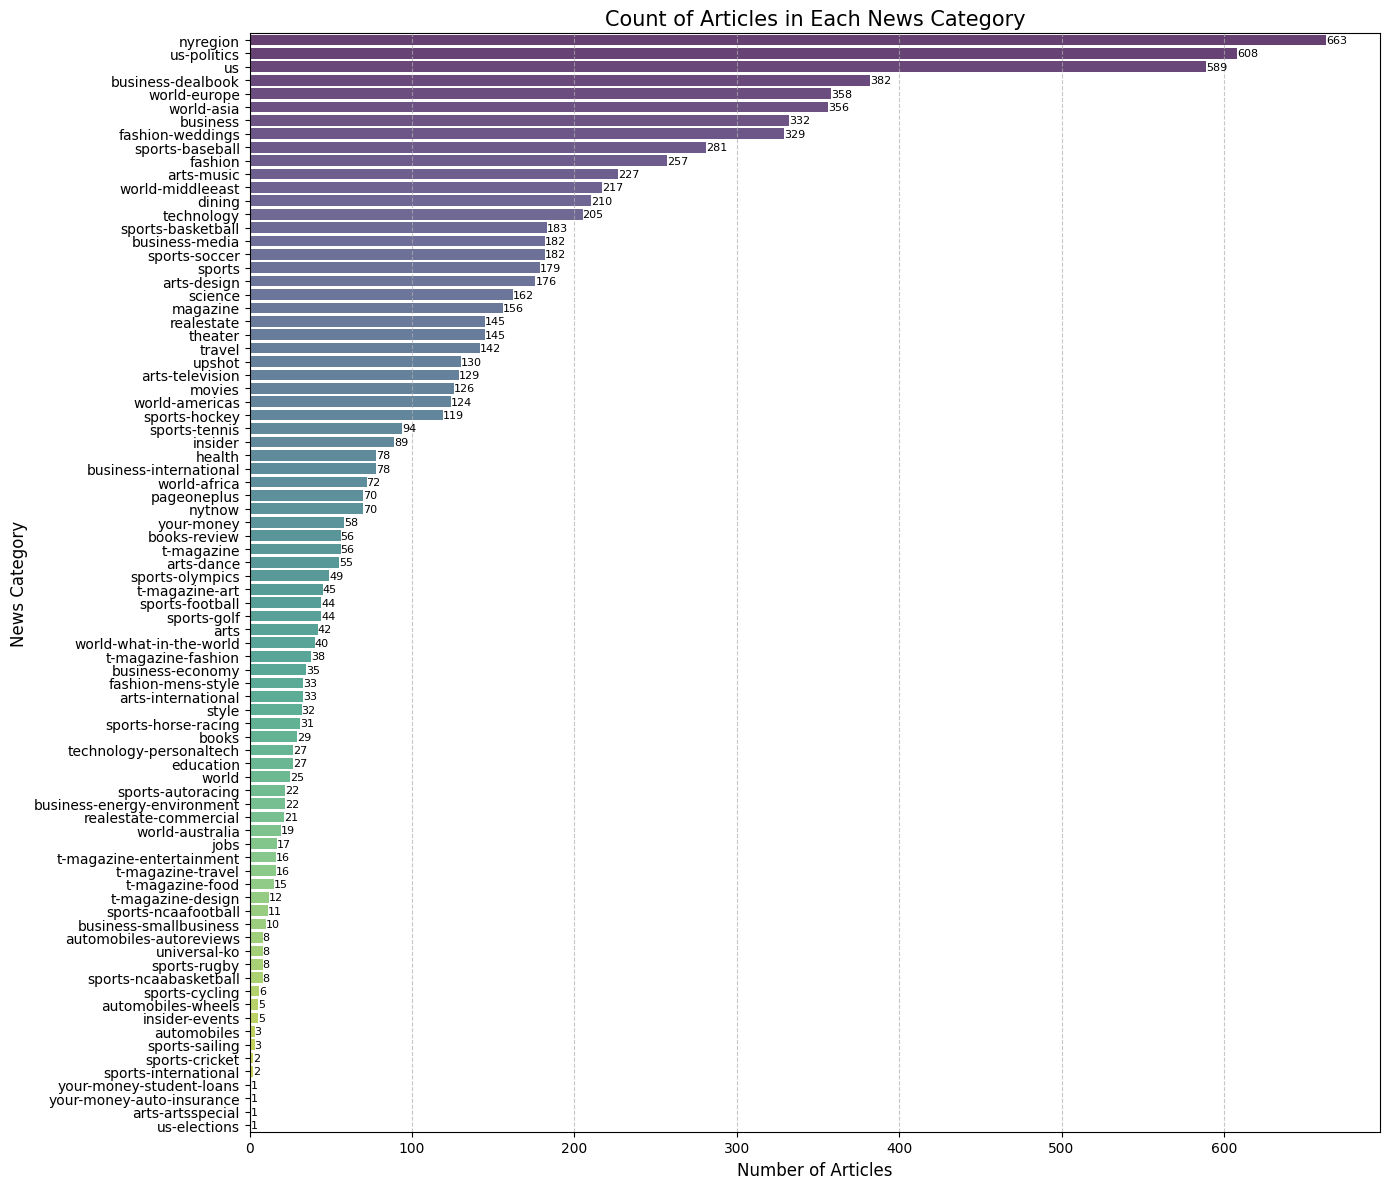

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of articles in each news category
count_by_category = df['news_category'].value_counts()

# Create a horizontal bar chart of the results
plt.figure(figsize=(14, 12))
sns.barplot(x=count_by_category.values, y=count_by_category.index, palette='viridis', alpha=0.8)

# Annotate each bar with the actual count
for index, value in enumerate(count_by_category.values):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=8)

plt.xlabel('Number of Articles', fontsize=12)
plt.ylabel('News Category', fontsize=12)
plt.title('Count of Articles in Each News Category', fontsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust spacing and rotate y-axis labels
plt.tight_layout()
plt.yticks(fontsize=10)

plt.show()

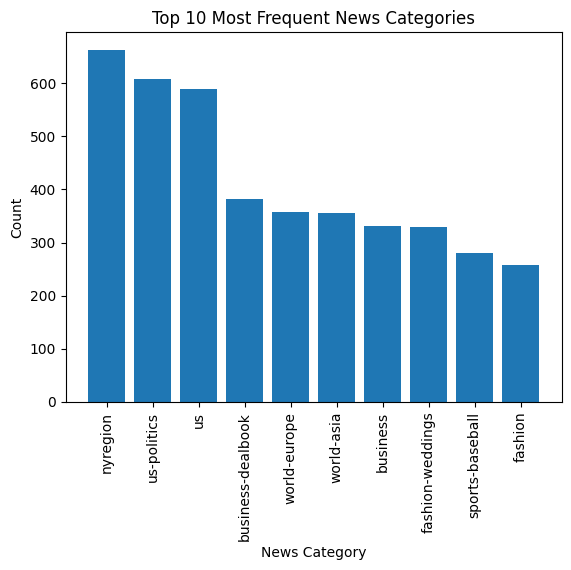

In [36]:

# Create a bar chart of the top 10 most frequent news categories
top_10_categories = df['news_category'].value_counts().head(10)
plt.bar(top_10_categories.index, top_10_categories.values)
plt.xticks(rotation=90)
plt.xlabel('News Category')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent News Categories')
plt.show()


In [38]:
# prompt: download the df into new css file

df.to_csv('new_nytimes_news_articles.csv', index=False)
